In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

In [5]:
from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy

In [9]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test

In [13]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

 Задание № 1 (Обязательно) Вам даны результаты проверки двух препаратов.

Требуется:

    Оценить, есть ли различие в эффекте у этих пациентов?
    Визуально подтвердить результат

A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.


In [15]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [17]:
stat, p = mannwhitneyu(A, B)
stat, p

(4343.0, 0.054347680446611354)

(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

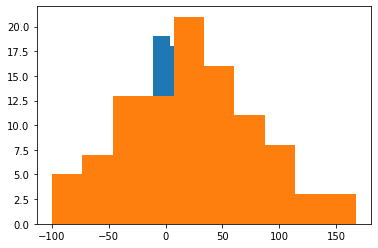

In [18]:
plt.hist(A)
plt.hist(B)

In [ ]:
p больше 5%, нулевая теория подтверждена. p близко к 5% можно попробовать другой тест

 Задание № 2 (Обязательно) Вам даны результаты проверки двух препаратов.

Требуется:

    Оценить, есть ли различие в эффекте у этих пациентов?
    Визуально подтвердить результат

А - группа людей без препарата.

B - та же группа людей, но получающая препарат


In [14]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [11]:
stat, p = wilcoxon(A, B)
stat, p

(1930.0, 0.04077572901549266)

(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

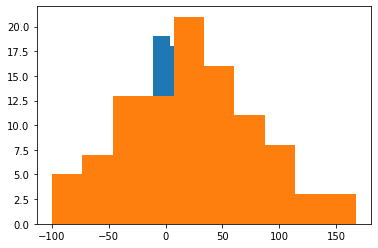

In [12]:
plt.hist(A)
plt.hist(B)

p меньше 5%, значит отвергаем нулевую теорию

 Задание № 3 (Обязательно) Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.

    Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
    Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]


In [19]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

In [20]:
F, p = f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python
alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


In [24]:
F, p = f_oneway(nutri, mineral)  # дисперсионный анализ (ДА) в python
alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

18.128724672228838 0.0001213673340124552
Разное распределение (отклоняем H0)


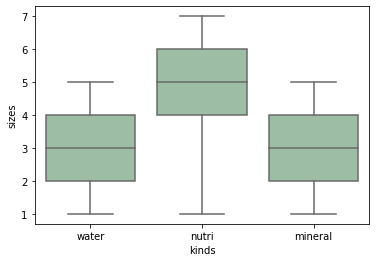

In [21]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
 
#Немного преобразуем данные, не важно как
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

In [ ]:
по диаграмме видно что nutri отличается от mineral в большую сторону

# Cookie Cats (Обязательно)

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию: 

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры. 

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков. 

# Данные A/B тестирования

In [22]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

    userid - уникальный номер, идентифицирующий каждого игрока.

    version - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

    sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

    retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

    retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.


 Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.

Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать seaborn c его sns.boxplot/sns.carplot, sns.barplot, но можно обойтись и обычном matplotlib


In [23]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [ ]:
Количество игроков с воротами установленными на уровне 40 больше, чем на уровне 30

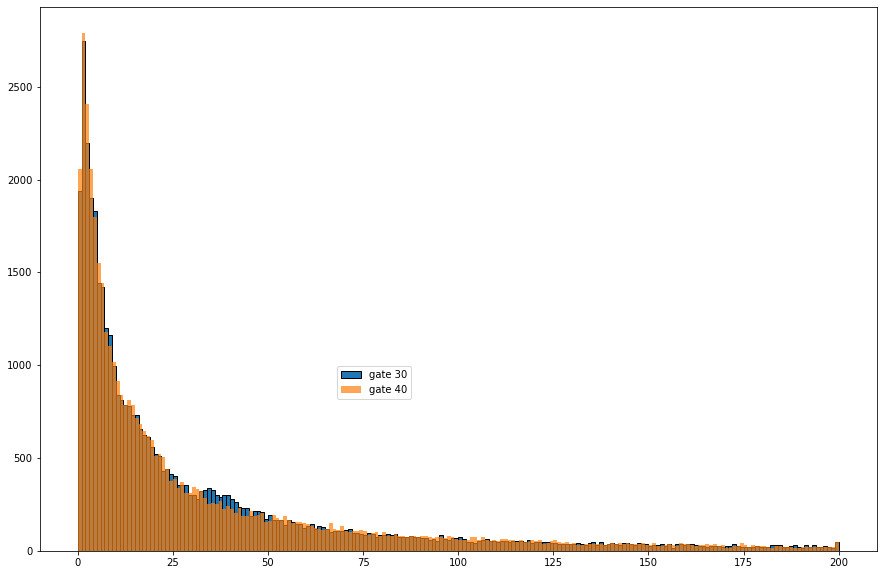

In [25]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

In [ ]:
По диаграмме сложно сделать выводы. Данные схожи

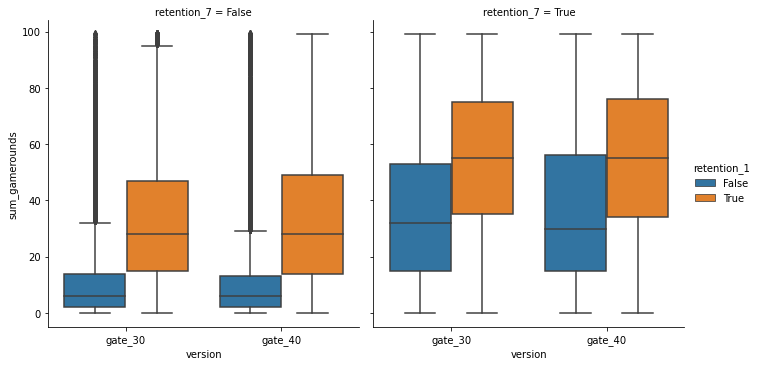

In [26]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

По диаграмме сложно сделать выводы. Данные схожи

In [27]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код. 
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [28]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
stat, p

(1009027049.5, 0.025104403860221253)

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

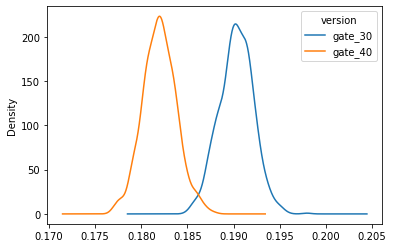

In [29]:
# #Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# # Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

p меньше 5%, нулевая теория отвергается. Эффект из-за сдвига ворот есть. Ворота лучше установить на 30 уровне

# Покемоны и AB-тестирование

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.
Описание набора данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

    pid: Numeric - ID покемона
    HP: Numeric - Очки здоровья
    Attack: Numeric - Сила обычной атаки
    Defense: Numeric - Сила обычной защиты
    Sp. Atk: Numeric - Сила специальной атаки
    Sp. Def: Numeric - Сила специальной защиты
    Speed: Numeric - Скорость движений
    Legendary: Boolean - «True», если покемон редкий
    Class 1: Categorical - Класс покемона
    Class 2: Categorical - Класс покемона


In [30]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


 Задание № 1 (Обязательно):

Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.


In [45]:
Grass = pokemon.loc[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')]


In [46]:
Rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]


In [107]:
grass = Grass.loc[(Grass['Class 1'] != 'Rock')]
grass1 = grass.loc[(grass['Class 2'] != 'Rock')]

In [108]:
rock = Rock.loc[(Rock['Class 1'] != 'Grass')]
rock1 = rock.loc[(rock['Class 2'] != 'Grass')]

In [109]:
stat, p = mannwhitneyu(grass1['Attack'], rock1['Attack'])
stat, p

(2216.0, 0.0003724955361876179)

91.78571428571429 73.3103448275862


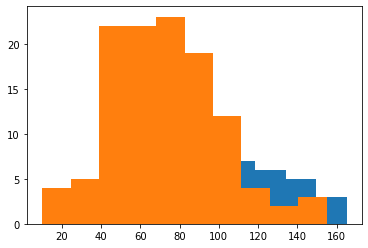

In [110]:
print(np.mean(rock1['Attack']), np.mean(grass1['Attack']))
plt.hist(rock1['Attack'])
plt.hist(grass1['Attack']);

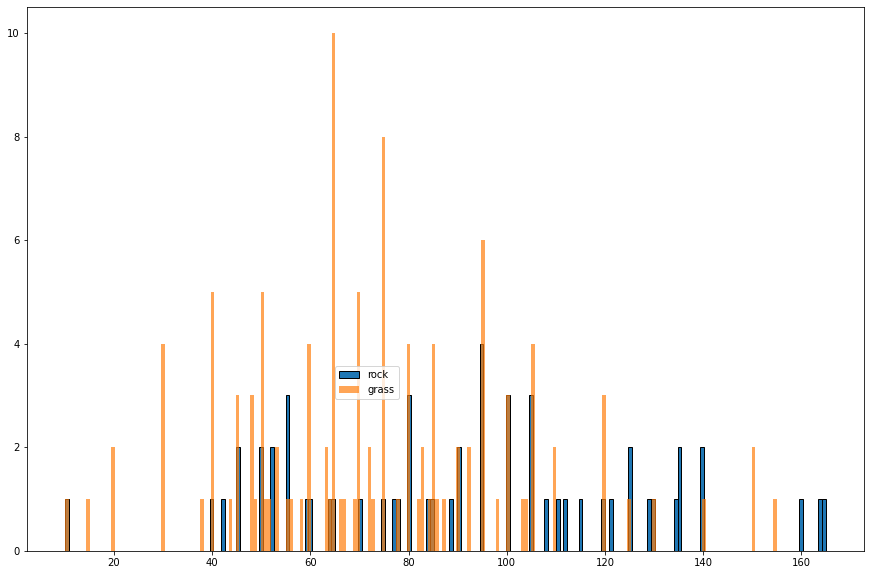

In [111]:
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(rock1['Attack'], bins=bins, alpha=1, edgecolor='black', label='rock')
plt.hist(grass1['Attack'], bins=bins, alpha=0.7, label='grass')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

p меньше 5%. Нулевая гипотеза может быть отвергнута. Атаки покемонов класса rock выше, чем у grass

 Задание № 2 (Обязательно):

Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.


In [65]:
Water = pokemon.loc[(pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')]

In [63]:
Normal = pokemon.loc[(pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')]

In [112]:
water = Water.loc[(Water['Class 1'] != 'Normal')]
water1 = water.loc[(water['Class 2'] != 'Normal')]

In [113]:
normal = Normal.loc[(Normal['Class 1'] != 'Water')]
normal1 = normal.loc[(normal['Class 2'] != 'Water')]

In [114]:
stat, p = mannwhitneyu(water1['Speed'], normal1['Speed'])
stat, p

(5299.5, 0.019054075952764978)

64.936 72.25742574257426


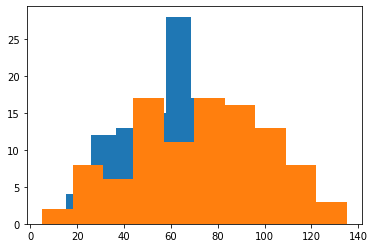

In [115]:
print(np.mean(water1['Speed']), np.mean(normal1['Speed']))
plt.hist(water1['Speed'])
plt.hist(normal1['Speed']);

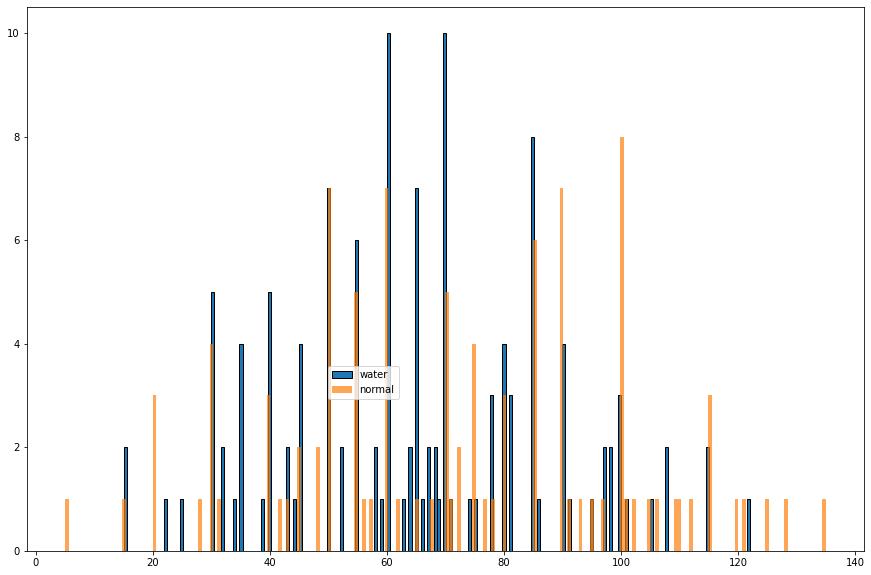

In [116]:
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(water1['Speed'], bins=bins, alpha=1, edgecolor='black', label='water')
plt.hist(normal1['Speed'], bins=bins, alpha=0.7, label='normal')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

p меньше 5%. Нулевая гипотеза может быть отвергнута. Скорость покемонов класса normal выше, чем у water

 Задание № 3:

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.


In [70]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [71]:
reinforced = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]
reinforced

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [72]:
ordinary = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)]
ordinary

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [73]:
stat, p = mannwhitneyu(reinforced['Speed'], ordinary['Speed'])
stat, p

(19.5, 0.0003226818390404643)

145.0 67.89195979899498


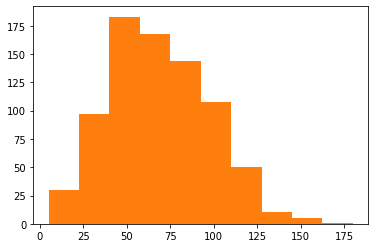

In [74]:
print(np.mean(reinforced['Speed']), np.mean(ordinary['Speed']))
plt.hist(reinforced['Speed'])
plt.hist(ordinary['Speed']);

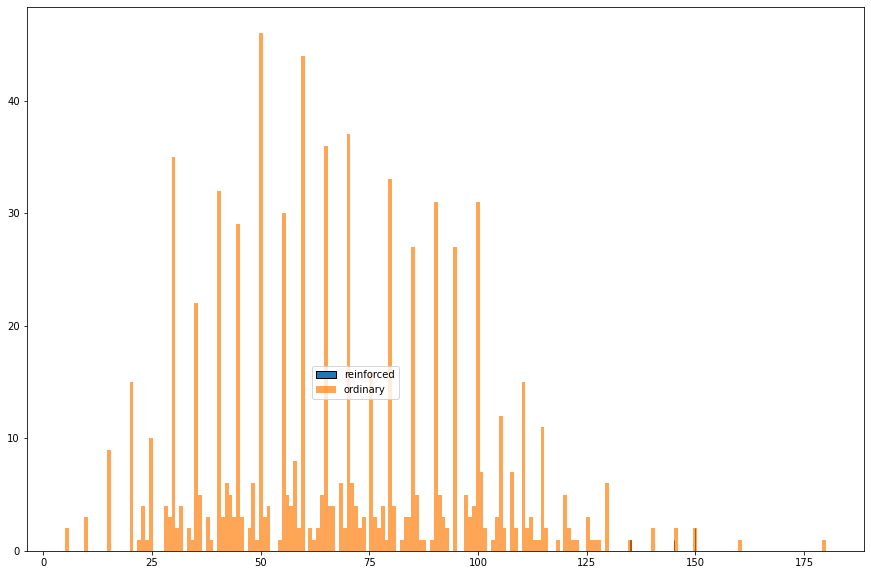

In [76]:
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(reinforced['Speed'], bins=bins, alpha=1, edgecolor='black', label='reinforced')
plt.hist(ordinary['Speed'], bins=bins, alpha=0.7, label='ordinary')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

p меньше 5%. Нулевая гипотеза может быть отвергнута. Скорость покемонов принявших сыворутку выше, чем у остальных покемонов

 Задание № 5:

Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.


In [133]:
pokemon['sum_characteristics'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['product of characteristics'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_characteristics,product of characteristics
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [137]:
Legendary = pokemon.loc[pokemon['Legendary'] == True]

In [136]:
simple = pokemon.loc[pokemon['Legendary'] == False]


In [138]:
stat, p = mannwhitneyu(Legendary['sum_characteristics'], simple['sum_characteristics'])
stat, p

(5576.0, 5.635221584292926e-25)

309.0769230769231 214.4108843537415


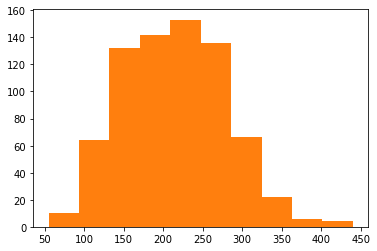

In [139]:
print(np.mean(Legendary['sum_characteristics']), np.mean(simple['sum_characteristics']))
plt.hist(Legendary['sum_characteristics'])
plt.hist(simple['sum_characteristics']);

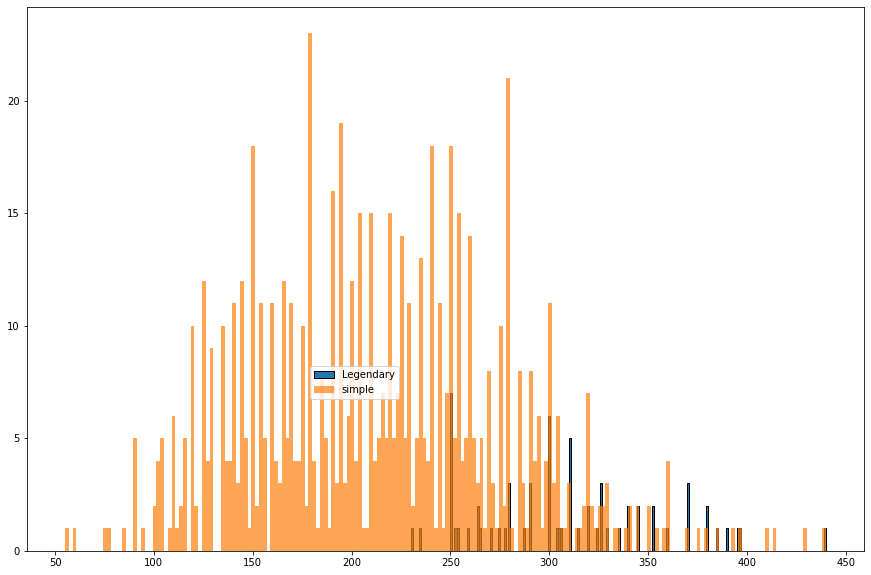

In [140]:
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(Legendary['sum_characteristics'], bins=bins, alpha=1, edgecolor='black', label='Legendary')
plt.hist(simple['sum_characteristics'], bins=bins, alpha=0.7, label='simple')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

p меньше 5%. нулевая теория отвергается. Характеристики легендарных покемонов выше чем у обычных

In [141]:
stat, p = mannwhitneyu(Legendary['product of characteristics'], simple['product of characteristics'])
stat, p

(5741.5, 1.4775262883780305e-24)

1085941.6153846155 425041.38911564625


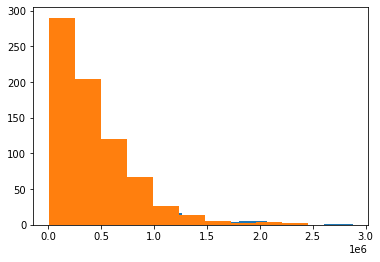

In [142]:
print(np.mean(Legendary['product of characteristics']), np.mean(simple['product of characteristics']))
plt.hist(Legendary['product of characteristics'])
plt.hist(simple['product of characteristics']);

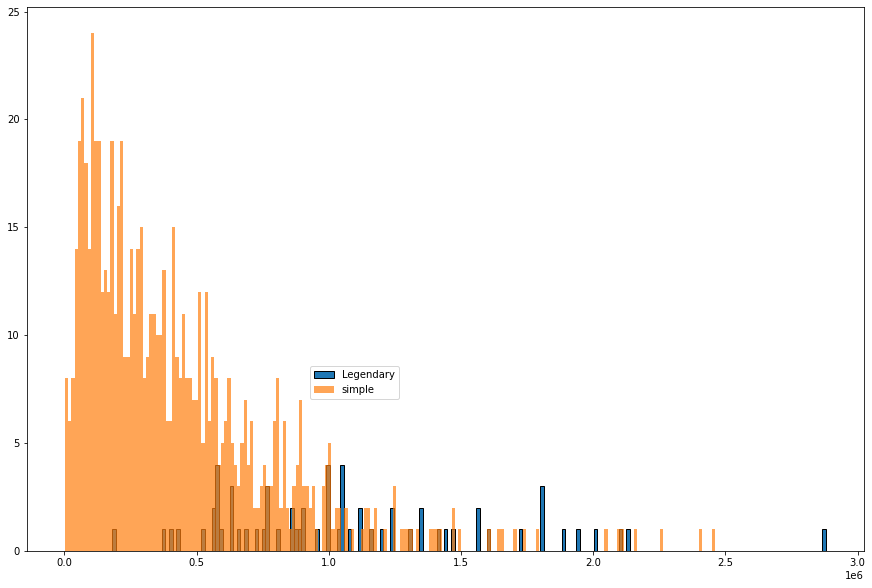

In [143]:
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(Legendary['product of characteristics'], bins=bins, alpha=1, edgecolor='black', label='Legendary')
plt.hist(simple['product of characteristics'], bins=bins, alpha=0.7, label='simple')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

p меньше 5%. нулевая теория отвергается. Характеристики легендарных покемонов выше чем у обычных

 Задание № 6:

Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.


In [79]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [93]:
Rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]

In [106]:
rock1 = Rock.loc[(Rock['Class 1'] != 'Ground')]
rock2 = rock1.loc[(rock1['Class 1'] != 'Steel')]
rock3 = rock2.loc[(rock2['Class 1'] != 'Ice')]
rock4 = rock3.loc[(rock3['Class 2'] != 'Ice')]
rock5 = rock4.loc[(rock4['Class 2'] != 'Steel')]
rock6 = rock5.loc[(rock5['Class 2'] != 'Ground')]

In [117]:
Ground = pokemon.loc[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]

In [120]:
ground1 = Ground.loc[(Ground['Class 1'] != 'Rock')]
ground2 = ground1.loc[(ground1['Class 1'] != 'Steel')]
ground3 = ground2.loc[(ground2['Class 1'] != 'Ice')]
ground4 = ground3.loc[(ground3['Class 2'] != 'Ice')]
ground5 = ground4.loc[(ground4['Class 2'] != 'Steel')]
ground6 = ground5.loc[(ground5['Class 2'] != 'Rock')]

In [121]:
Steel = pokemon.loc[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]

In [122]:
steel1 = Steel.loc[(Steel['Class 1'] != 'Ground')]
steel2 = steel1.loc[(steel1['Class 1'] != 'Rock')]
steel3 = steel2.loc[(steel2['Class 1'] != 'Ice')]
steel4 = steel3.loc[(steel3['Class 2'] != 'Ice')]
steel5 = steel4.loc[(steel4['Class 2'] != 'Rock')]
steel6 = steel5.loc[(steel5['Class 2'] != 'Ground')]

In [123]:
Ice = pokemon.loc[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]

In [124]:
ice1 = Ice.loc[(Ice['Class 1'] != 'Ground')]
ice2 = ice1.loc[(ice1['Class 1'] != 'Steel')]
ice3 = ice2.loc[(ice2['Class 1'] != 'Rock')]
ice4 = ice3.loc[(ice3['Class 2'] != 'Rock')]
ice5 = ice4.loc[(ice4['Class 2'] != 'Steel')]
ice6 = ice5.loc[(ice5['Class 2'] != 'Ground')]

In [125]:
F, p = f_oneway(rock6['Defense'], ground6['Defense'], steel6['Defense'], ice6['Defense'])  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

8.820416931465497 1.885892116821956e-05
Разное распределение (отклоняем H0)


104.09756097560975 81.07692307692308 109.325 78.51515151515152


''

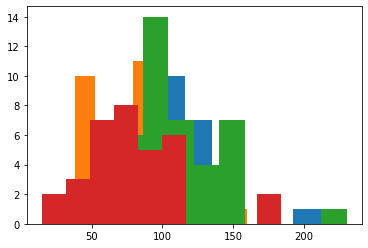

In [131]:
print(np.mean(rock6['Defense']), np.mean(ground6['Defense']), np.mean(steel6['Defense']), np.mean(ice6['Defense']))
plt.hist(rock6['Defense'])
plt.hist(ground6['Defense'])
plt.hist(steel6['Defense'])
plt.hist(ice6['Defense'])
;

In [ ]:
классы покемонов отличаются по уровню защиты